A system of non-linear equations is defined by F(x)=0 where F(x)={f1(x1,..,xn),f2(x1,..,xn),....,fn(x1,..,xn)}.

In [26]:
import sys
import os
sys.path.append(os.path.abspath("../Codes"))

from system_nonlinear_eq.newton_nonlinear import newton_solver
from system_nonlinear_eq.steepest_descent_nonlinear import steepest_descent_solver

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

# ---------- Define Variables and System ----------
x1, x2, x3= sp.symbols('x1 x2 x3')
x = [x1, x2,x3]

# Define your system of nonlinear equations here
f_sym = [3*x1 -sp.cos(x2*x3) - 0.5,x1**2-81*(x2+0.1)**2+sp.sin(x3)+1.06,sp.exp(-x2*x3)+20*x3+(10*3.1416-3)/3]

# Convert to numerical functions
f_np = [sp.lambdify(x, f, 'numpy') for f in f_sym]
n = len(f_sym)
x0 = np.array([0.1,0.1,-0.1])     # Initial guess
tol = 1e-6                    # Tolerance

sol_newton, err_newton = newton_solver(n, x, f_sym, f_np, x0.copy(), tol)
sol_sd, err_sd = steepest_descent_solver(n, x, f_sym, f_np, x0.copy(), tol)

# Results
print("\nNewton Solution:", sol_newton)
print("Steepest Descent Solution:", sol_sd)


Newton Solution: [ 5.00000000e-01 -6.53630249e-08 -5.23599998e-01]
Steepest Descent Solution: [ 4.99985032e-01 -1.01266282e-06 -5.23600275e-01]


In [27]:
print("Iteration needed for Newton's method= ",(len(err_newton)))
print("Iteration needed for Newton's method= ",(len(err_sd)))

Iteration needed for Newton's method=  5
Iteration needed for Newton's method=  226


Newton's method is efficient in computational time as it needs less iterations to reach accuracies.

In [28]:
# Error Comparison Table
df = pd.DataFrame({
    "Iteration": range(1, max(len(err_newton), len(err_sd)) + 1),
    "Newton Error": err_newton + [np.nan] * (len(err_sd) - len(err_newton)),
    "Steepest Descent Error": err_sd + [np.nan] * (len(err_newton) - len(err_sd))
})
print("\nComparison Table:")
print(df.head(15)) #first 15 data



Comparison Table:
    Iteration  Newton Error  Steepest Descent Error
0           1  5.897001e-01                0.451593
1           2  1.790619e-02                0.024390
2           3  1.553704e-03                0.029758
3           4  1.205591e-05                0.027371
4           5  7.259297e-10                0.031726
5           6           NaN                0.024387
6           7           NaN                0.022699
7           8           NaN                0.017951
8           9           NaN                0.018963
9          10           NaN                0.016287
10         11           NaN                0.017309
11         12           NaN                0.014875
12         13           NaN                0.015806
13         14           NaN                0.013587
14         15           NaN                0.014435


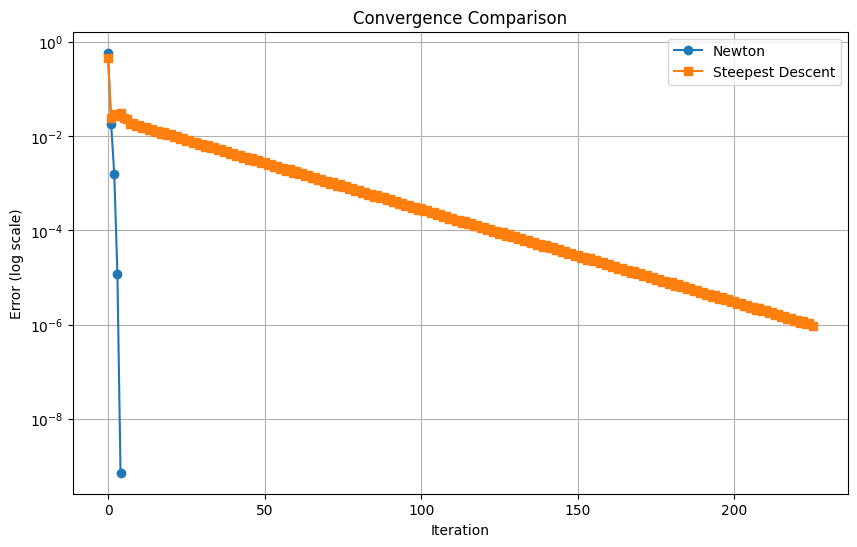

In [29]:
# visualization
plt.figure(figsize=(10,6))
plt.plot(err_newton, marker='o', label='Newton')
plt.plot(err_sd, marker='s', label='Steepest Descent')
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Error (log scale)")
plt.title("Convergence Comparison")
plt.grid(True)
plt.legend()
plt.show()

Newton's method gives more accurate results (approximately 1e-9) than steepest descent method (approximately 1e-6).